In [1]:
import os
import pickle
import numpy as np
import uproot
import time
import matplotlib.pyplot as plt

In [2]:
# Note that these go in order from bottom, side, supplemental side
# from tof_alpha_source import *
# PMT_x_locations = bottom_PMTs_x + side_PMTs_x + supp_side_PMTs_x
# PMT_y_locations = bottom_PMTs_y + side_PMTs_y + supp_side_PMTs_y
# PMT_z_locations = bottom_PMTs_z + side_PMTs_z + supp_side_PMTs_z
# PMT_keys = bottom_PMT_list + side_PMT_list + supp_side_PMT_list
# PMT_location_dict = {
#     PMT_keys[i]: (PMT_x_locations[i], PMT_y_locations[i], PMT_z_locations[i])
#     for i in range(len(PMT_keys))
# }
IRRELEVANT_CHANNELS = [
    "adc_b1_ch0",
    "adc_b2_ch15",
    "adc_b4_ch12",
    "adc_b4_ch13",
    "adc_b4_ch14",
    "adc_b4_ch15",
]
PMT_location_dict = {
    "adc_b1_ch1": (381.0, -171.45, -677.1),
    "adc_b1_ch2": (381.0, -57.15, -677.1),
    "adc_b1_ch3": (381.0, 57.15, -677.1),
    "adc_b1_ch4": (381.0, 171.45, -677.1),
    "adc_b1_ch5": (190.5, -342.9, -677.1),
    "adc_b1_ch6": (190.5, -228.6, -677.1),
    "adc_b1_ch7": (190.5, -114.3, -677.1),
    "adc_b1_ch8": (190.5, 0.0, -677.1),
    "adc_b1_ch9": (190.5, 114.3, -677.1),
    "adc_b1_ch10": (190.5, 228.6, -677.1),
    "adc_b1_ch11": (190.5, 342.9, -677.1),
    "adc_b1_ch12": (0.0, -400.05, -677.1),
    "adc_b1_ch13": (0.0, -285.75, -677.1),
    "adc_b1_ch14": (0.0, -171.45, -677.1),
    "adc_b1_ch15": (0.0, -57.15, -677.1),
    "adc_b2_ch0": (0.0, 57.15, -677.1),
    "adc_b2_ch1": (0.0, 171.45, -677.1),
    "adc_b2_ch2": (0.0, 285.75, -677.1),
    "adc_b2_ch3": (0.0, 400.05, -677.1),
    "adc_b2_ch4": (-190.5, -342.9, -677.1),
    "adc_b2_ch5": (-190.5, -228.6, -677.1),
    "adc_b2_ch6": (-190.5, -114.3, -677.1),
    "adc_b2_ch7": (-190.5, 0.0, -677.1),
    "adc_b2_ch8": (-190.5, 114.3, -677.1),
    "adc_b2_ch9": (-190.5, 228.6, -677.1),
    "adc_b2_ch10": (-190.5, 342.9, -677.1),
    "adc_b2_ch11": (-381.0, -171.45, -677.1),
    "adc_b2_ch12": (-381.0, -57.15, -677.1),
    "adc_b2_ch13": (-381.0, 57.15, -677.1),
    "adc_b2_ch14": (-381.0, 171.45, -677.1),
    "adc_b3_ch0": (-532.955, 0.0, -495.3),
    "adc_b3_ch1": (-532.955, 0.0, -336.55),
    "adc_b3_ch2": (-532.955, 0.0, 222.25),
    "adc_b3_ch3": (-532.955, 0.0, 393.7),
    "adc_b3_ch4": (532.955, 0.0, -495.3),
    "adc_b3_ch5": (532.955, 0.0, -336.55),
    "adc_b3_ch6": (532.955, 0.0, 222.25),
    "adc_b3_ch7": (532.955, 0.0, 393.7),
    "adc_b3_ch8": (0.0, -532.955, -495.3),
    "adc_b3_ch9": (0.0, -532.955, -336.55),
    "adc_b3_ch10": (0.0, -532.955, 222.25),
    "adc_b3_ch11": (0.0, -532.955, 393.7),
    "adc_b3_ch12": (0.0, 532.955, -495.3),
    "adc_b3_ch13": (0.0, 532.955, -336.55),
    "adc_b3_ch14": (0.0, 532.955, 222.25),
    "adc_b3_ch15": (0.0, 532.955, 393.7),
    "adc_b4_ch0": (-376.8561, -376.8561, -211.0232),
    "adc_b4_ch1": (-376.8561, -376.8561, -41.1607),
    "adc_b4_ch2": (-376.8561, -376.8561, 128.7018),
    "adc_b4_ch3": (376.8561, 376.8561, -211.0232),
    "adc_b4_ch4": (376.8561, 376.8561, -41.1607),
    "adc_b4_ch5": (376.8561, 376.8561, 128.7018),
    "adc_b4_ch6": (376.8561, -376.8561, -211.0232),
    "adc_b4_ch7": (376.8561, -376.8561, -41.1607),
    "adc_b4_ch8": (376.8561, -376.8561, 128.7018),
    "adc_b4_ch9": (-376.8561, 376.8561, -211.0232),
    "adc_b4_ch10": (-376.8561, 376.8561, -41.1607),
    "adc_b4_ch11": (-376.8561, 376.8561, 128.7018),
}

# using ALL data from 4 phases, see /media/disk_o/my_analysis/medians.py
PMT_channel_delay_dict = {
    "adc_b1_ch1": np.float64(8.030119938430738),
    "adc_b1_ch2": np.float64(5.160596843708807),
    "adc_b1_ch3": np.float64(6.183129915008303),
    "adc_b1_ch4": np.float64(2.1006828929114034),
    "adc_b1_ch5": np.float64(6.2045754222843446),
    "adc_b1_ch6": np.float64(6.161676253769009),
    "adc_b1_ch7": np.float64(4.561973370592692),
    "adc_b1_ch8": np.float64(4.059154543523331),
    "adc_b1_ch9": np.float64(4.527702749808608),
    "adc_b1_ch10": np.float64(4.89672876798353),
    "adc_b1_ch11": np.float64(6.264616928546467),
    "adc_b1_ch12": np.float64(4.0887738673544405),
    "adc_b1_ch13": np.float64(3.6559960302367407),
    "adc_b1_ch14": np.float64(4.5739947702690955),
    "adc_b1_ch15": np.float64(5.575061440615521),
    "adc_b2_ch0": np.float64(6.316710428600398),
    "adc_b2_ch1": np.float64(4.6156615340751275),
    "adc_b2_ch2": np.float64(4.651063059501854),
    "adc_b2_ch3": np.float64(4.240215238749752),
    "adc_b2_ch4": np.float64(3.29829818445931),
    "adc_b2_ch5": np.float64(3.9065740208083692),
    "adc_b2_ch6": np.float64(6.998608781647993),
    "adc_b2_ch7": np.float64(5.218269533126902),
    "adc_b2_ch8": np.float64(1.5691269263153176),
    "adc_b2_ch9": np.float64(5.048373360049517),
    "adc_b2_ch10": np.float64(6.101505155220909),
    "adc_b2_ch11": np.float64(5.9255042831075135),
    "adc_b2_ch12": np.float64(4.576728227848958),
    "adc_b2_ch13": np.float64(4.806394551240132),
    "adc_b2_ch14": np.float64(3.4518309802066334),
    "adc_b3_ch0": np.float64(4.219983404983012),
    "adc_b3_ch1": np.float64(2.3410189582944896),
    "adc_b3_ch2": np.float64(4.38371641420724),
    "adc_b3_ch3": np.float64(6.840023772731689),
    "adc_b3_ch4": np.float64(2.1118156288779253),
    "adc_b3_ch5": np.float64(2.5750972348009955),
    "adc_b3_ch6": np.float64(4.730938465704396),
    "adc_b3_ch7": np.float64(3.9063029644947553),
    "adc_b3_ch8": np.float64(4.337709021825615),
    "adc_b3_ch9": np.float64(5.3446182004022),
    "adc_b3_ch10": np.float64(3.2323137947678804),
    "adc_b3_ch11": np.float64(4.585152794796352),
    "adc_b3_ch12": np.float64(3.1823386547200014),
    "adc_b3_ch13": np.float64(4.146583102970336),
    "adc_b3_ch14": np.float64(4.054654654843673),
    "adc_b3_ch15": np.float64(2.008745263456964),
    "adc_b4_ch0": np.float64(3.728169312817592),
    "adc_b4_ch1": np.float64(3.172271565996006),
    "adc_b4_ch2": np.float64(5.504018432122031),
    "adc_b4_ch3": np.float64(4.67892164680153),
    "adc_b4_ch4": np.float64(2.8893489155116834),
    "adc_b4_ch5": np.float64(2.8683819880358103),
    "adc_b4_ch6": np.float64(3.9172990994935835),
    "adc_b4_ch7": np.float64(4.9451057648992744),
    "adc_b4_ch8": np.float64(11.154814540200347),
    "adc_b4_ch9": np.float64(3.349086284111587),
    "adc_b4_ch10": np.float64(4.758447378646148),
    "adc_b4_ch11": np.float64(4.971188071773195),
}


def get_1t_info(fname: str):
    f = uproot.open(fname)
    daq = f["daq"]
    # sometimes this isn't in the root file
    if "run_info" in f:
        run_info = f["run_info"]
    else:
        run_info = None
    daqkeys = daq.keys()
    traces = {}
    for key in daq.keys():
        if "adc" in key:
            traces[key] = daq[key].array(library="np")
    event_ttt1 = daq["event_ttt_1"].array(library="np")
    event_ttt2 = daq["event_ttt_2"].array(library="np")
    event_ttt3 = daq["event_ttt_3"].array(library="np")
    event_ttt4 = daq["event_ttt_4"].array(library="np")
    event_ttt5 = daq["event_ttt_5"].array(library="np")
    event_id = daq["event_id"].array(library="np")
    event_sanity = daq["event_sanity"].array(library="np")
    # event_ttt = daq['event_ttt'].array(library='np')

    return (
        traces,
        event_ttt1.astype(np.int64),
        event_ttt2.astype(np.int64),
        event_ttt3.astype(np.int64),
        event_ttt4.astype(np.int64),
        event_ttt5.astype(np.int64),
        event_id,
        event_sanity,
        daqkeys,
        run_info,
    )


def base_and_flip(waveform):
    """Subtract baseline and reflect over x axis"""
    positive_waveform = (waveform - np.median(waveform)) * (-1)
    return positive_waveform


def weighted_average_hit_time(waveform, window_size=10):
    """Do weighted average in window around pulse. Returns float value at which
    hit time occurred"""
    # Call correction algorithm
    waveform = base_and_flip(waveform)

    # Make into list
    waveform = list(waveform)

    # Find index of max (the pulse peak)
    peak_index = waveform.index(max(waveform))

    # Define window bounds
    half_window = window_size // 2
    start = max(0, peak_index - half_window)
    end = min(len(waveform), peak_index + half_window + 1)

    # Get time (index) and amplitude (value) in the window
    times = list(range(start, end))
    amplitudes = waveform[start:end]

    # Compute weighted average hit time
    numerator = sum(t * a for t, a in zip(times, amplitudes))
    denominator = sum(amplitudes)

    if denominator == 0:
        return None  # Avoid divide-by-zero
    return numerator / denominator


def get_channel_charge(waveform):
    """Takes in a raw waveform. Does baseline subtraction, makes it positive, make window of
    size 60ns / 30 sample, integrate by just taking sum (nothing fancy), divide by 50 (resistance),
    returns charge in pC"""
    based_flipped = base_and_flip(waveform)
    time_of_max = np.argmax(based_flipped)
    charge_pC = np.sum(based_flipped[time_of_max - 5 : time_of_max + 5]) / 50
    return charge_pC


def waveform_daisy_correction(waveform, boardID):
    if (boardID < 1) or (boardID > 4):
        print("Bad BoardID")
        return False
    elif boardID != 1:
        return waveform[24 * (4 - boardID) : -24 * (boardID - 1)]
    else:
        return waveform[24 * 3 :]


def is_pulse(waveform: np.ndarray, range_min: int = 0, range_max: int = 1928) -> bool:
    """Shit function"""
    threshold_sigma = 15
    # this is arbitrary, and hopefully sufficient
    baseline = np.median(waveform[: int(0.5 * len(waveform))])
    noise_std = np.std(waveform[: int(0.5 * len(waveform))])
    deviation = np.abs(waveform - baseline)
    threshold = threshold_sigma * noise_std

    # Get all indices where deviation exceeds threshold
    pulse_indices = np.where(deviation > threshold)[0]
    for i in pulse_indices:
        if range_min <= i <= range_max:
            return True
    return False

def is_pulse2(waveform: np.ndarray, range_min: int = 0, range_max: int = 1928) -> bool:
    """Takes in a daisy corrected waveform and looks in a given range to see if there is a pulse.
    For example, you can use some range around an alpha PMT hit if looking for just alpha detections.
    """
    if np.abs(np.median(waveform) - np.min(waveform)) > 50:
        return True
    return False

def is_pulse3(waveform: np.ndarray, range_min: int = 0, range_max: int = 1928) -> bool:
    """Takes in a daisy corrected waveform and looks in a given range to see if there is a pulse.
    For example, you can use some range around an alpha PMT hit if looking for just alpha detections.
    """
    wave_cut = waveform[range_min:range_max]
    if np.max(wave_cut) - np.min(wave_cut) > 50:
        return True
    return False

def b1_ch0_or_b2_ch15_detections(traces):
    """These are bottom paddle channels, gets list of events with detections."""
    b1_ch0_only_list = []
    b2_ch15_only_list = []

    b1_ch0_waveforms_list = traces["adc_b1_ch0"]
    b2_ch15_waveforms_list = traces["adc_b2_ch15"]
    for i, waveform in enumerate(b1_ch0_waveforms_list):
        if is_pulse(waveform):  # this is arbitrary, and hopefully this is sufficient
            b1_ch0_only_list.append(i)
    for i, waveform in enumerate(b2_ch15_waveforms_list):
        if is_pulse(waveform):  # this is arbitrary, and hopefully this is sufficient
            b2_ch15_only_list.append(i)
    return b1_ch0_only_list, b2_ch15_only_list


def b4_ch13_or_ch14_detections(traces):
    """These are top paddle channels, gets list of events with detections."""
    b4_ch13_or_ch14_detection_list = []
    waveforms_list = traces["adc_b4_ch13"] + traces["adc_b4_ch14"]
    for i, waveform in enumerate(waveforms_list):
        if is_pulse(waveform):  # this is arbitrary, and hopefully this is sufficient
            b4_ch13_or_ch14_detection_list.append(i)
    return b4_ch13_or_ch14_detection_list


def top_paddle_event_list(traces) -> list[int]:
    """Returns a list of event indices that correspond to top_paddle trigger events.
    This means b4_ch13 OR b4_ch14 has a signal AND that the superposition of signals
    for that event lies in the time range for top_paddle events."""

    twice_checked_top_paddle_event_index_list = []
    num_events = len(traces["adc_b2_ch1"])  # pick arbitrary PMT, all same length
    top_paddle_PMT_events = b4_ch13_or_ch14_detections(traces)  # fix for top_paddle

    for i in range(num_events):
        corrected_waveforms_per_event = []
        # waveform loop to get the i_th waveform for each PMT
        for key in traces.keys():
            if ("b5" in key) or (key in IRRELEVANT_CHANNELS):  # Adam said disregard
                continue
            board_num = int(key[5])
            uncorrected_waveform = traces[key][i]

            corrected_waveforms_per_event.append(
                waveform_daisy_correction(uncorrected_waveform, board_num)
            )
        summed_waveform = np.sum(corrected_waveforms_per_event, axis=0)
        peak_sample_time_ns = np.argmin(summed_waveform) * 2  # converts to ns
        # rough estimate of time range
        if 750 < peak_sample_time_ns and i in top_paddle_PMT_events:
            twice_checked_top_paddle_event_index_list.append(i)
    return twice_checked_top_paddle_event_index_list

In [ ]:
# make list of tuples where it's (event indx, charge around maximum)
charges_for_histogram = []
# make list of tuples where it's (event indx, is_pulse(waveform))
is_pulse_test = []


# phase_directory = "/media/disk_d/WbLS-DATA/raw_root/phase3/muon/" # Oct 31, 2024
phase_directory = "/media/disk_e/WbLS-DATA/raw_root/phase3/muon/"  # Nov 13, 2024
# phase_directory = "/media/disk_a/WbLS-DATA/raw_root/phase6/muon/" # Jan 07, 2025
# phase_directory = "/media/disk_b/WbLS-DATA/raw_root/phase6/muon/" # Dec 19, 2024
# phase_directory = "/media/disk_e/WbLS-DATA/raw_root/phase4/muon/" # Dec 03, 2024
# phase_directory = "/media/disk_k/WbLS-DATA/raw_root/phase8/muon/" # Mar 11, 2025
file_paths_for_ch_delays = [
    phase_directory + str(f)
    for f in os.listdir(phase_directory)
    if os.path.isfile(os.path.join(phase_directory, f))
][:1]


for f in file_paths_for_ch_delays:
    traces = get_1t_info(f)[0]
    num_events = len(traces["adc_b2_ch1"])  # pick arbitrary PMT, all same length
    bobby=[42, 185, 286, 347, 671, 768, 845, 1054, 1143, 1226, 1332, 1927, 1937, 2067, 2079, 2170, 2206, 2253, 2280, 2312, 2494, 2532, 2690, 2750, 3056, 3292, 3292, 3416, 3436, 3475, 3819, 4040, 4059, 4070, 4079, 4135, 4219, 4377, 4443, 4491, 4749, 4754, 4972, 4987, 5093, 5291, 5380, 5387, 5399, 5547, 5559, 5713, 5760, 5782, 6028, 6187, 6726, 6819, 7114, 7135, 7360, 7360, 7384, 7558, 7655, 7657, 7758, 7995, 8061, 8160, 8221, 8251, 8599, 8628, 8785, 8794, 8795, 8969, 8977, 8995, 9123, 9382, 9442, 9636, 9677, 9797]
    for i in bobby:#range(4490,4491):
        corrected_waveforms_per_event = []
        # waveform loop to get the i_th waveform for each PMT
        for key in traces.keys():
            # if ("b5" in key) or (key in IRRELEVANT_CHANNELS):  # Adam said disregard
            #     continue
            if key not in ["adc_b1_ch0", "adc_b2_ch15"]: # bottom paddles only
                continue
            board_num = int(key[5])
            waveform = traces[key][i]
            waveform = waveform_daisy_correction(waveform, board_num) * 2
            is_pulse_test.append((i, is_pulse3(waveform)))
            charges_for_histogram.append((i, get_channel_charge(waveform)))
            
            
            # if is_pulse3(waveform):
            #     is_pulse_test.append((i, ))
            #     print(f"yes we have a pulse for event {i} and key {key}")
            #     # plt.plot(waveform)
            #     # # Add labels and title
            #     # plt.xlabel("time")
            #     # plt.ylabel("amplitude")
            #     # plt.title("waveform")

            #     # # Show the plot
            #     # plt.show()
            #     # plt.close()
            # else:
            #     print("no pulse here, sad")
            
            plt.plot(waveform)
            # Add labels and title
            plt.xlabel("time")
            plt.ylabel("amplitude")
            plt.title("waveform")

            # Show the plot
            plt.show()
            plt.close()
            print(np.max(waveform) - np.min(waveform))
            print("\n" + "\n" + "\n")
# Create histogram
# list1 = [x[0] for x in charges_for_histogram if x[1]>15]
# list2 = [x[0] for x in is_pulse_test if x[1] is True]
# print(list1, "\n", list2)
# # print(set1-set2)
# print(set(list2)-set(list1)) # is_pulse is overcounting a lottttt it seems. lets check these events

plt.hist([x[1] for x in charges_for_histogram], bins="auto", color='blue', alpha=0.7, edgecolor='black')

# Add labels
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram Example')

# Show plot
plt.show()

# charge > 15pC [42, 185, 286, 347, 671, 768, 845, 1054, 1143, 1226, 1332, 1927, 1937, 2067, 2079, 2170, 2206, 2253, 2280, 2312, 2494, 2532, 2690, 2750, 3056, 3292, 3292, 3416, 3436, 3475, 3819, 4040, 4059, 4070, 4079, 4135, 4219, 4377, 4443, 4491, 4749, 4754, 4972, 4987, 5093, 5291, 5380, 5387, 5399, 5547, 5559, 5713, 5760, 5782, 6028, 6187, 6726, 6819, 7114, 7135, 7360, 7360, 7384, 7558, 7655, 7657, 7758, 7995, 8061, 8160, 8221, 8251, 8599, 8628, 8785, 8794, 8795, 8969, 8977, 8995, 9123, 9382, 9442, 9636, 9677, 9797] 
# is_pulse [42, 137, 185, 220, 248, 286, 347, 388, 544, 620, 671, 768, 845, 1007, 1040, 1054, 1143, 1226, 1331, 1332, 1535, 1718, 1718, 1927, 1937, 2042, 2067, 2079, 2118, 2170, 2206, 2253, 2262, 2280, 2312, 2494, 2532, 2690, 2750, 3056, 3109, 3148, 3248, 3292, 3292, 3416, 3436, 3475, 3576, 3640, 3695, 3719, 3819, 3869, 4040, 4059, 4070, 4079, 4135, 4219, 4234, 4377, 4443, 4490, 4491, 4553, 4749, 4754, 4754, 4891, 4891, 4972, 4987, 5018, 5093, 5128, 5291, 5293, 5321, 5380, 5387, 5399, 5547, 5559, 5614, 5713, 5760, 5782, 5836, 6006, 6028, 6102, 6181, 6187, 6311, 6726, 6819, 6980, 7114, 7135, 7252, 7280, 7360, 7360, 7384, 7558, 7655, 7657, 7668, 7703, 7758, 7786, 7792, 7901, 7995, 8061, 8160, 8221, 8251, 8476, 8489, 8541, 8599, 8628, 8785, 8794, 8795, 8969, 8977, 8995, 8999, 9108, 9123, 9382, 9442, 9636, 9677, 9677, 9738, 9797]
# only counted by is_pulse {388, 3719, 5128, 137, 9738, 4234, 4490, 1040, 9108, 7703, 5018, 4891, 8476, 3869, 544, 3109, 6181, 6311, 8999, 8489, 5293, 3248, 1331, 1718, 3640, 6980, 2118, 3576, 5321, 4553, 3148, 5836, 7252, 2262, 6102, 220, 7901, 8541, 7786, 620, 5614, 3695, 7280, 7792, 1007, 7668, 6006, 248, 2042, 1535}


In [ ]:
import pickle
# 96 is bad
with open('/media/disk_o/my_pickles/good_processed_data_for_disk_e_phase_3_all.pkl', 'rb') as f:
    data = pickle.load(f)
events = data["all_events_for_phase"]
print(data.keys())

for i in range(len(events)):
    num_hits = len(events[i]["hits"])
    for j in range(num_hits):
        if events[i]["hits"][j][3] is None:
            print(i)

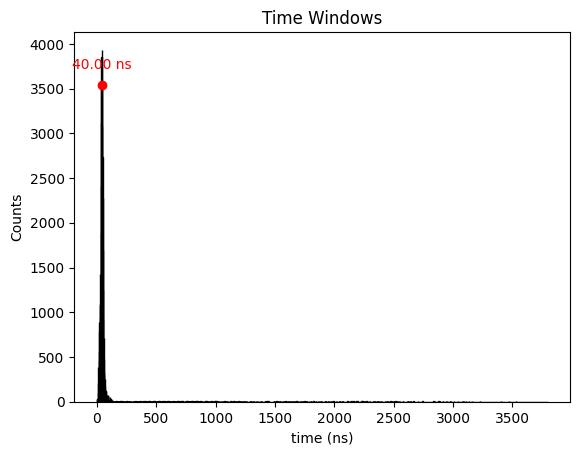

In [6]:
# phase_directory = "/media/disk_d/WbLS-DATA/raw_root/phase3/muon/" # Oct 31, 2024
phase_directory = "/media/disk_e/WbLS-DATA/raw_root/phase3/muon/"  # Nov 13, 2024
# phase_directory = "/media/disk_a/WbLS-DATA/raw_root/phase6/muon/" # Jan 07, 2025
# phase_directory = "/media/disk_b/WbLS-DATA/raw_root/phase6/muon/" # Dec 19, 2024
# phase_directory = "/media/disk_e/WbLS-DATA/raw_root/phase4/muon/" # Dec 03, 2024
# phase_directory = "/media/disk_k/WbLS-DATA/raw_root/phase8/muon/" # Mar 11, 2025
file_paths_for_ch_delays = [
    phase_directory + str(f)
    for f in os.listdir(phase_directory)
    if os.path.isfile(os.path.join(phase_directory, f))
][:5]

time_windows = []
for f in file_paths_for_ch_delays:
    traces = get_1t_info(f)[0]
    num_events = len(traces["adc_b1_ch1"])  # pick arbitrary PMT, all same length
    for i in range(num_events):
        corrected_waveforms_per_event = []
        # waveform loop to get the i_th waveform for each PMT
        for key in traces.keys():
            if ("b5" in key) or (key in IRRELEVANT_CHANNELS):  # Adam said disregard
                continue
            board_num = int(key[5])
            uncorrected_waveform = base_and_flip(traces[key][i])

            corrected_waveforms_per_event.append(
                waveform_daisy_correction(uncorrected_waveform, board_num)
            )
        summed_waveform = np.sum(corrected_waveforms_per_event, axis=0)
        summed_waveform_cumsum = np.cumsum(summed_waveform)

        # Normalize cumulative sum so that the final value is 1
        summed_waveform_cumsum /= summed_waveform_cumsum[-1]

        # Desired percentage thresholds
        start_percent = 0.05  # 5%
        end_percent = 0.95    # 95%

        # Find the first index where cumulative sum reaches or exceeds the thresholds
        start_index = np.searchsorted(summed_waveform_cumsum, start_percent)
        end_index = np.searchsorted(summed_waveform_cumsum, end_percent)
        time_windows.append((end_index-start_index)*2) # turns index time to ns time
        # print(f"Start index (5%): {start_index}")
        # print(f"End index (95%): {end_index}")
# print(time_windows)
median_value = np.median(time_windows)

# Create the histogram
counts, bins, patches = plt.hist(time_windows, bins="auto", edgecolor='black')

# Find y-position for the red dot (put it slightly above the histogram for visibility)
# You can choose the maximum height of the histogram
y_pos = counts.max() * 0.9

# Plot the red dot at the median
plt.plot(median_value, y_pos, 'ro')

# Add text next to the dot
plt.text(median_value, y_pos * 1.05, f'{median_value:.2f} ns', color='red', ha='center')


# Add labels and title (optional)
plt.xlabel('time (ns)')
plt.ylabel('Counts')
plt.title('Time Windows')

# Show the plot
plt.show()